In [1]:
simulation = read.csv('output/simulation/simulation.csv', sep=',')

head(simulation)

,actual_treatment,bor.cyc.dex,bor.dex,bor.len.dex,len.dex,non.treatment,simulated_treatment
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Bor-Len-Dex,0.05878889,0.05878889,0.06798916,0.05878889,0.1679083,Bor-Len-Dex
2,Bor-Len-Dex,0.38353607,0.38353607,0.38353607,0.38353607,0.4710193,Bor-Len-Dex
3,Bor-Len-Dex,0.29957958,0.29957958,0.29957958,0.29957958,0.4229702,Bor-Len-Dex
4,Bor-Cyc-Dex,0.07120492,0.07120492,0.08040518,0.07120492,0.2054156,Bor-Len-Dex
5,Bor-Len-Dex,0.47173991,0.47173991,0.47173991,0.47173991,0.5624829,Bor-Len-Dex
6,Bor-Cyc-Dex,0.30255651,0.30255651,0.31454493,0.30255651,0.3634586,Bor-Len-Dex


In [2]:
df <- merge(aggregate(. ~ actual_treatment, data=simulation, FUN=length), 
       aggregate(. ~ actual_treatment + simulated_treatment, data=simulation, FUN=length), by='actual_treatment')

df <- df[c('actual_treatment', 'simulated_treatment.y', 'bor.cyc.dex.x', 'bor.cyc.dex.y')]

colnames(df) <- c('actual_treatment', 'simulated_treatment', 'global_count', 'local_count')

df$count <- df$local_count / df$global_count 

df

actual_treatment,simulated_treatment,global_count,local_count,count
<fct>,<fct>,<int>,<int>,<dbl>
Bor-Cyc-Dex,Bor-Cyc-Dex,142,86,0.6056338
Bor-Cyc-Dex,Bor-Len-Dex,142,56,0.3943662
Bor-Dex,Bor-Dex,64,50,0.7812500
Bor-Dex,Bor-Len-Dex,64,14,0.2187500
Bor-Len-Dex,Bor-Len-Dex,236,236,1.0000000
Len-Dex,Bor-Len-Dex,50,14,0.2800000
Len-Dex,Len-Dex,50,36,0.7200000


In [3]:

agg1 <- aggregate(. ~ actual_treatment, data=simulation, FUN=length)
agg2 <- aggregate(. ~ actual_treatment + simulated_treatment, data=simulation, FUN=length)

#agg <- merge(agg1$bor.cyc.dex, agg2$bor.cyc.dex)


#agg <- data.frame(actual_treatment=agg1$actual_treatment, 
#                  simulated_treatment=agg2$simulated_treatment, 
#                  length=agg$bor.cyc.dex)

#aggregate(. ~ actual_treatment, data=simulation, FUN=length)$bor.cyc.dex
agg <- merge(agg1, agg2, by='actual_treatment')[c('actual_treatment', 
                                                  'bor.cyc.dex.x',
                                                  'simulated_treatment.y', 
                                                  'bor.cyc.dex.y')]

colnames(agg) <- c('actual_treatment', 'global.count', 'simulated_treatment', 'local.count')

agg$count <- agg$local.count / agg$global.count

agg

actual_treatment,global.count,simulated_treatment,local.count,count
<fct>,<int>,<fct>,<int>,<dbl>
Bor-Cyc-Dex,142,Bor-Cyc-Dex,86,0.6056338
Bor-Cyc-Dex,142,Bor-Len-Dex,56,0.3943662
Bor-Dex,64,Bor-Dex,50,0.7812500
Bor-Dex,64,Bor-Len-Dex,14,0.2187500
Bor-Len-Dex,236,Bor-Len-Dex,236,1.0000000
Len-Dex,50,Bor-Len-Dex,14,0.2800000
Len-Dex,50,Len-Dex,36,0.7200000


In [4]:
agg <- agg[with(agg, order(actual_treatment, count)),]

agg

,actual_treatment,global.count,simulated_treatment,local.count,count
,<fct>,<int>,<fct>,<int>,<dbl>
2,Bor-Cyc-Dex,142,Bor-Len-Dex,56,0.3943662
1,Bor-Cyc-Dex,142,Bor-Cyc-Dex,86,0.6056338
4,Bor-Dex,64,Bor-Len-Dex,14,0.2187500
3,Bor-Dex,64,Bor-Dex,50,0.7812500
5,Bor-Len-Dex,236,Bor-Len-Dex,236,1.0000000
6,Len-Dex,50,Bor-Len-Dex,14,0.2800000
7,Len-Dex,50,Len-Dex,36,0.7200000


In [5]:
library(scales)
numColors <- length(levels(agg$actual_treatment)) # How many colors you need
getColors <- scales::hue_pal() # Create a function that takes a number and returns a qualitative palette of that length (from the scales package)
myPalette <- getColors(numColors)
names(myPalette) <- levels(agg$actual_treatment) # Give every color an appropriate name
# p <- p + theme(axis.text.x = element_text(colour=myPalette[agg$actual_treatment])))
myPalette['Bor-Cyc-Dex'] <- '#7CAE00'
myPalette['Bor-Dex'] <- '#C77CFF'
myPalette['Bor-Len-Dex'] <- '#F8766D'
myPalette['Len-Dex'] <- '#00BFC4'
myPalette

Warning message:
"package 'scales' was built under R version 3.6.3"


Bor-Cyc-Dex     Bor-Dex Bor-Len-Dex     Len-Dex 
  "#7CAE00"   "#C77CFF"   "#F8766D"   "#00BFC4"

Warning message:
"Ignoring unknown aesthetics: order"
Warning message:
"Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2."


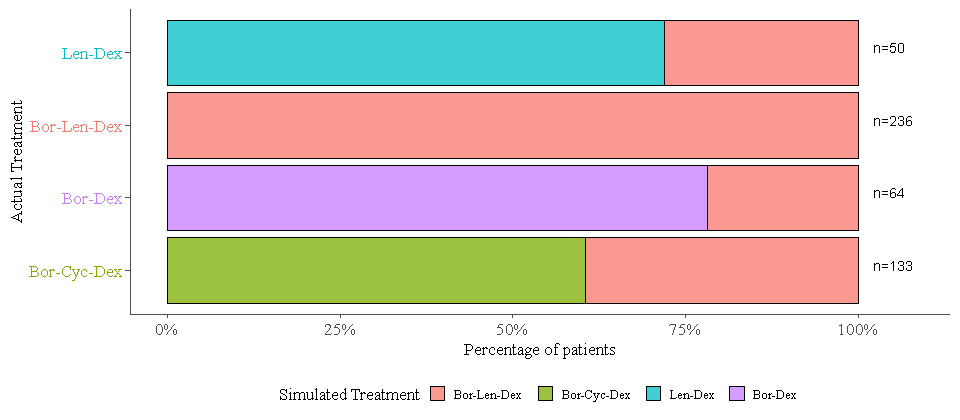

In [19]:
library(ggplot2)

ticks.line.color <- 'grey30'

labels <- data.frame(x=c('Len-Dex', 'Bor-Len-Dex', 'Bor-Dex', 'Bor-Cyc-Dex'), 
                     y=c(1.01, 1.01, 1.01, 1.01), 
                     lab=c('  n=50', '  n=236', '  n=64', '  n=133')) 

p <- ggplot() +
     geom_bar(data=agg, alpha=.75, 
              aes(
                 x=actual_treatment, 
                 y=count, 
                 fill=reorder(simulated_treatment, count, FUN=mean), order=count), 
              stat="identity", color='black') +
     xlab('Actual Treatment') + 
     ylab('Percentage of patients') +
     scale_y_continuous(labels=scales::percent, limits=c(0, 1.08), breaks=c(0, .25, .5, .75, 1.)) +
     theme_bw() + 
     theme(panel.border          = element_blank(), 
           panel.grid.major      = element_blank(),
           panel.grid.minor      = element_blank(), 
           axis.line             = element_line(colour=ticks.line.color),
           text                  = element_text(size=10, family="serif"),
           legend.key.size       = unit(10, "pt"),
           legend.position       = 'bottom',
           axis.text.x           = element_text(size=10, angle=0, colour=ticks.line.color),
           axis.text.y           = element_text(size=10, colour=myPalette[unique(agg$actual_treatment)]),
           axis.title.x          = element_text(vjust=1),
           axis.ticks            = element_line(color=ticks.line.color),
           plot.background       = element_rect(fill="transparent", color=NA), # bg of the plot
           legend.box.background = element_rect(color=NA, fill="transparent"), # get rid of legend panel bg
           legend.background     = element_rect(colour=NA, size=0),
           legend.key            = element_rect(fill="transparent", colour=NA), # get rid of key legend fill, 
                                                                                # and of the surrounding
    ) +
    scale_fill_discrete(name = "Simulated Treatment") + 
    geom_text(data=labels, aes(x=x, y=y, label=lab), vjust=0, hjust=0, fontface='plain', size=3) +
    coord_flip()
     
ggsave('images/simulation_v3.pdf', p, units='cm', width=14, height=6)

options(repr.plot.width=8, repr.plot.height=3.5)

p

In [7]:
agg[with(agg, order(actual_treatment, simulated_treatment)),]

,actual_treatment,global.count,simulated_treatment,local.count,count
,<fct>,<int>,<fct>,<int>,<dbl>
1,Bor-Cyc-Dex,142,Bor-Cyc-Dex,86,0.6056338
2,Bor-Cyc-Dex,142,Bor-Len-Dex,56,0.3943662
3,Bor-Dex,64,Bor-Dex,50,0.7812500
4,Bor-Dex,64,Bor-Len-Dex,14,0.2187500
5,Bor-Len-Dex,236,Bor-Len-Dex,236,1.0000000
6,Len-Dex,50,Bor-Len-Dex,14,0.2800000
7,Len-Dex,50,Len-Dex,36,0.7200000
